In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive"

 3bf8d096-732c-4d52-bf9f-1d37553461ed.mp4
 5916af7d-369f-497c-ae08-22cb6eaf8481.mp4
 68442724_395538214490543_6595216501152677888_n.jpg
 68489398_2460084987570510_5956882574537129984_n.jpg
 69236041_2840603665969040_6384175625137029120_n.jpg
'archive (3)'
 Bilal
 Bilal_12_marksheet.jpeg
 Bilal_BECS_pass_certificate.jpeg
 Bilal_CNIC_back.jpg
 Bilal_CNIC_front.jpeg
'Bilal IT Teacher.pdf'
 Bilal-.jpeg
'Bilal .jpg'
'Bilal Python cv.pdf'
'Class Lecture 02 (1).ppt'
'Class Lecture 02.ppt'
'Colab Notebooks'
'cvt assignment.pdf'
 D-19-CSE-10.pdf
 ENA.pdf
'Getting started.pdf'
 IMG_0247.MOV
 IMG_0248.MOV
 IMG_0265.MOV
 IMG_0266.MOV
 IMG_0267.MOV
 IMG_0270.MOV
 IMG_0271.MOV
 IMG_0272.MOV
 IMG_0273.MOV
 IMG_0313.MOV
 IMG_0314.MOV
 IMG_0315.MOV
 IMG_0316.MOV
 IMG_0636.MOV
 IMG_0670.MOV
 IMG_0695.MOV
 IMG_0718.MOV
 Katdrive
'Lecture 01 (1).ppt'
'Lecture 01.ppt'
'Lecture 04A Nodal Analysis (1).pdf'
'Lecture 04A Nodal Analysis.pdf'
'Lecture 04B Mesh Analysis [Compatibility Mode] (1).pdf'
'Lecture 04B 

In [ ]:
import os, shutil

Dataset:

In [ ]:
original_dataset_dir = "./drive/My Drive/Malik Pics"
base_dir = "./drive/My Drive/Colab Notebooks/bs_working_directory"
# os.mkdir(base_dir)

In [ ]:
train_dir = os.path.join(base_dir, "train")
# os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, "validation")
# os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, "test")
# os.mkdir(test_dir)

Directories for trainning, validation and testing data:

In [ ]:
train_bilal_dir = os.path.join(train_dir, "bilal")
# os.mkdir(train_bilal_dir)

train_saif_dir = os.path.join(train_dir, "saif")
# os.mkdir(train_saif_dir)

validation_bilal_dir = os.path.join(validation_dir, "bilal")
# os.mkdir(validation_bilal_dir)

validation_saif_dir = os.path.join(validation_dir, "saif")
# os.mkdir(validation_saif_dir)

test_bilal_dir = os.path.join(test_dir, "bilal")
# os.mkdir(test_bilal_dir)

test_saif_dir = os.path.join(test_dir, "saif")
# os.mkdir(test_saif_dir)

In [ ]:
original_dataset_dir = "./drive/My Drive/Malik Pics"
fnames = ['bilal{}.jpeg'.format(i+1) for i in range(10)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_bilal_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['bilal{}.jpeg'.format(i+1) for i in range(10, 15)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_bilal_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['bilal{}.jpeg'.format(i+1) for i in range(15, 20)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_bilal_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['saif{}.jpeg'.format(i+1) for i in range(10)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_saif_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['saif{}.jpeg'.format(i+1) for i in range(10, 15)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_saif_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['saif{}.jpeg'.format(i+1) for i in range(15, 20)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_saif_dir, fname)
  shutil.copyfile(src, dst)

dataset status now:

In [ ]:
print('total training Bilal images:', len(os.listdir(train_bilal_dir)))
print('total training Saif images:', len(os.listdir(train_saif_dir)))
print('total validation Bilal images:', len(os.listdir(validation_bilal_dir)))
print('total validation Saif images:', len(os.listdir(validation_saif_dir)))
print('total test Bilal images:', len(os.listdir(test_bilal_dir)))
print('total test Saif images:', len(os.listdir(test_saif_dir)))

total training Bilal images: 10
total training Saif images: 10
total validation Bilal images: 5
total validation Saif images: 5
total test Bilal images: 5
total test Saif images: 5


Building Model:

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()

#convolutional base
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#Flatten
model.add(layers.Flatten())

#Dense classifier
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Summary:

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 17, 17, 128)      

Compilation (optimizer & loss):

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Data pre-processing --> ImageDataGenerator:

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
#Rescaling

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size=(150, 150),
                  batch_size=2,
                  class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=2,
    class_mode='binary')

Found 20 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (2, 150, 150, 3)
labels batch shape: (2,)


Fitting:

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=10,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=5)

Epoch 1/15


<ipython-input-95-9790132a9c82>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


10/10 [==============================] - 4s 261ms/step - loss: 0.7937 - acc: 0.4000 - val_loss: 0.6896 - val_acc: 0.5000
Epoch 2/15
10/10 [==============================] - 3s 336ms/step - loss: 0.6859 - acc: 0.5500 - val_loss: 0.6867 - val_acc: 0.5000
Epoch 3/15
10/10 [==============================] - 3s 307ms/step - loss: 0.6554 - acc: 0.6000 - val_loss: 0.6856 - val_acc: 0.4000
Epoch 4/15
10/10 [==============================] - 2s 232ms/step - loss: 0.5961 - acc: 0.8500 - val_loss: 0.8160 - val_acc: 0.5000
Epoch 5/15
10/10 [==============================] - 3s 275ms/step - loss: 0.6391 - acc: 0.6000 - val_loss: 0.6709 - val_acc: 0.9000
Epoch 6/15
10/10 [==============================] - 3s 334ms/step - loss: 0.5545 - acc: 0.8000 - val_loss: 0.6554 - val_acc: 0.8000
Epoch 7/15
10/10 [==============================] - 4s 405ms/step - loss: 0.4980 - acc: 0.8500 - val_loss: 0.8037 - val_acc: 0.5000
Epoch 8/15
10/10 [==============================] - 3s 245ms/step - loss: 0.4939 - acc:

model saving:

In [ ]:
model.save('bilal_and_saif_small_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Plotting:

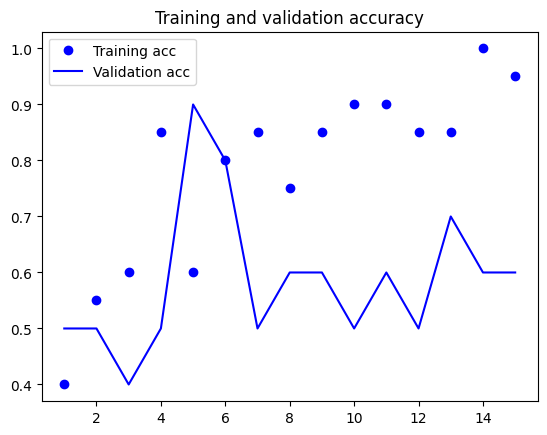

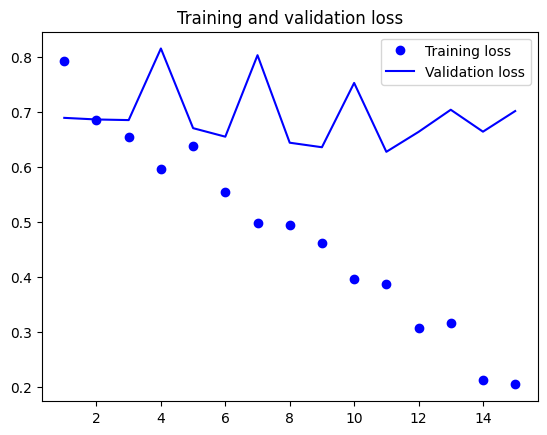

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Data augmentation by ImageDataGenerator:

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

Displaying some random images after augmentation:

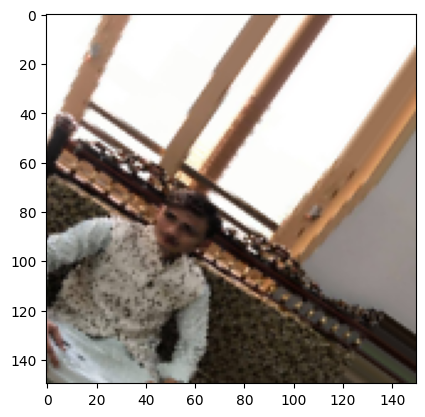

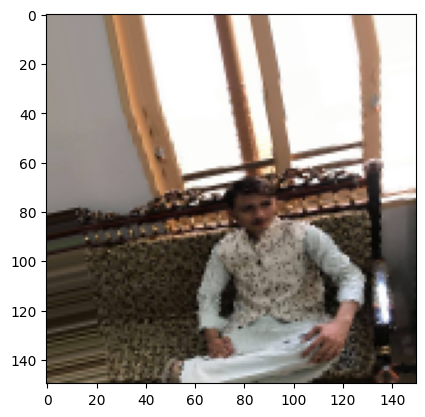

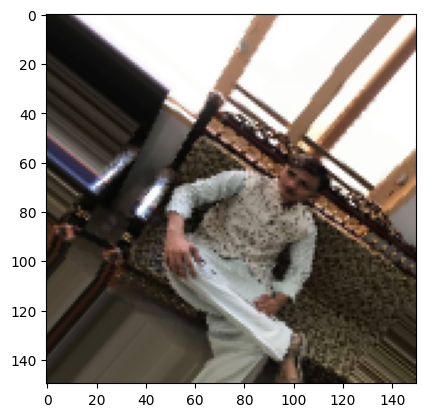

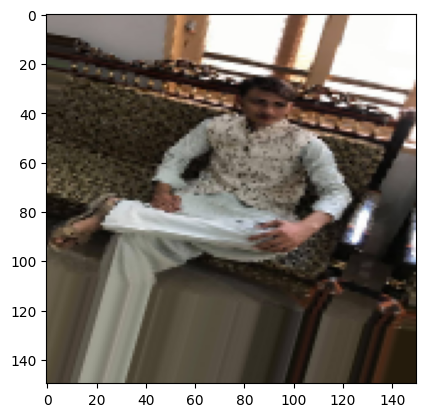

In [ ]:
from keras.preprocessing import image

fnames = [os.path.join(train_bilal_dir, fname) for
          fname in os.listdir(train_bilal_dir)]

img_path = fnames[5]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

New model includes dropout:

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Summary:

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 17, 17, 128)      

Again Compilation:

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Trainning using data augmentation generators:

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=2,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=2,
    class_mode='binary')

Found 20 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


Fitting:

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=10,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=5)

Epoch 1/100


<ipython-input-103-b40b4638a22d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


10/10 [==============================] - 5s 411ms/step - loss: 0.7546 - acc: 0.5000 - val_loss: 0.7021 - val_acc: 0.5000
Epoch 2/100
10/10 [==============================] - 2s 249ms/step - loss: 0.7147 - acc: 0.5500 - val_loss: 0.6993 - val_acc: 0.5000
Epoch 3/100
10/10 [==============================] - 3s 251ms/step - loss: 0.7015 - acc: 0.4000 - val_loss: 0.6942 - val_acc: 0.6000
Epoch 4/100
10/10 [==============================] - 3s 249ms/step - loss: 0.7160 - acc: 0.4500 - val_loss: 0.6932 - val_acc: 0.6000
Epoch 5/100
10/10 [==============================] - 3s 334ms/step - loss: 0.7035 - acc: 0.5500 - val_loss: 0.6908 - val_acc: 0.6000
Epoch 6/100
10/10 [==============================] - 2s 245ms/step - loss: 0.7027 - acc: 0.5500 - val_loss: 0.6854 - val_acc: 0.7000
Epoch 7/100
10/10 [==============================] - 2s 236ms/step - loss: 0.6797 - acc: 0.6500 - val_loss: 0.6837 - val_acc: 0.7000
Epoch 8/100
10/10 [==============================] - 2s 243ms/step - loss: 0.7033

In [ ]:
model.save('bilal_and_saif_small_2.h5')

Plotting:

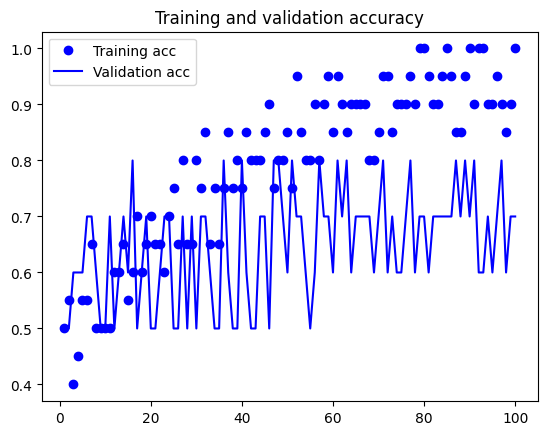

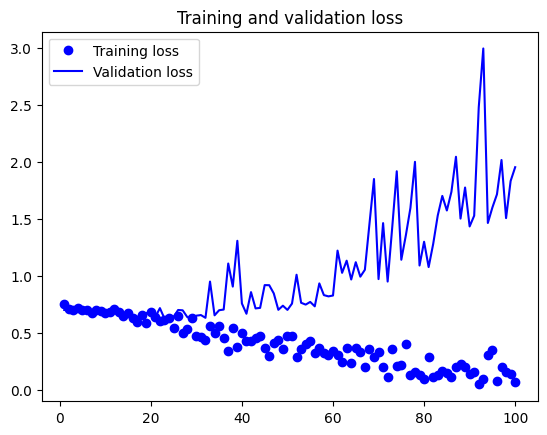

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()